# 🚢 Dataviz with Titanic dataset

## 🚚 Import packages and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

df_titanic_raw = sns.load_dataset('titanic')
df_titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df_titanic_raw[
    'who'
].unique()

array(['man', 'woman', 'child'], dtype=object)

## ⚙️ Data process

In [3]:
# Keeping only necessessary columns

df_test_test_test_test_test_test_test_test_test_test_test_test_titanic = df_titanic_raw.copy()
df_titanic = df_titanic_raw[[
    'sex',
    'who',
    'age',
    'class',
    'embark_town',
    'alive',
    'alone'
]]

# Formatting columns name

df_titanic = df_titanic.rename(columns={
    'who' : 'gender',
    'embark_town' : 'city'
})

df_titanic.columns = df_titanic.columns.str.title()

# Remove null values to have a proper dataset
df_titanic = df_titanic.dropna()

df_titanic['Age'] = df_titanic['Age'].astype('int64')
df_titanic['Alone'] = np.where(df_titanic['Alone'] == True, 'yes', 'no')

df_titanic.head(15)

,Sex,Gender,Age,Class,City,Alive,Alone
0,male,man,22,Third,Southampton,no,no
1,female,woman,38,First,Cherbourg,yes,no
2,female,woman,26,Third,Southampton,yes,yes
3,female,woman,35,First,Southampton,yes,no
4,male,man,35,Third,Southampton,no,yes
6,male,man,54,First,Southampton,no,yes
7,male,child,2,Third,Southampton,no,no
8,female,woman,27,Third,Southampton,yes,no
9,female,child,14,Second,Cherbourg,yes,no
10,female,child,4,Third,Southampton,yes,no


## 🎨 Data visualization

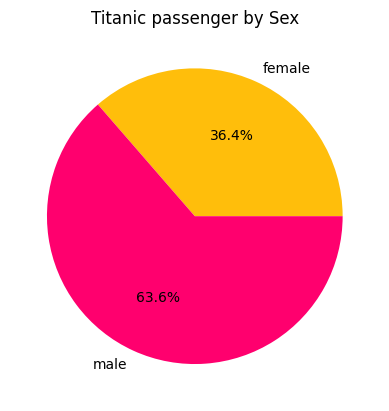

In [4]:
fig, ax = plt.subplots()

ax.pie(
    df_titanic['Sex'].value_counts().sort_values().values,
    labels = df_titanic['Sex'].value_counts().sort_values().index,
    colors=['#ffbe0b', '#ff006e', '#3a86ff'],
    autopct='%1.1f%%'
)

plt.title('Titanic passenger by Sex')

plt.show()

In [5]:
df_titanic_age = pd.DataFrame(np.arange(0, df_titanic['Age'].max() + 5, 1))

for item in df_titanic['Gender'].unique() :
    df_titanic_age = df_titanic_age.join(df_titanic[df_titanic['Gender'] == item]['Age'].value_counts().sort_index())
    df_titanic_age = df_titanic_age.rename(columns={'count' : item})

df_titanic_age = df_titanic_age.iloc[:,1:]
df_titanic_age = df_titanic_age.fillna(0)
df_titanic_age = df_titanic_age.astype('int64')
df_titanic_age['All'] = df_titanic_age.iloc[:,0:].sum(axis=1)

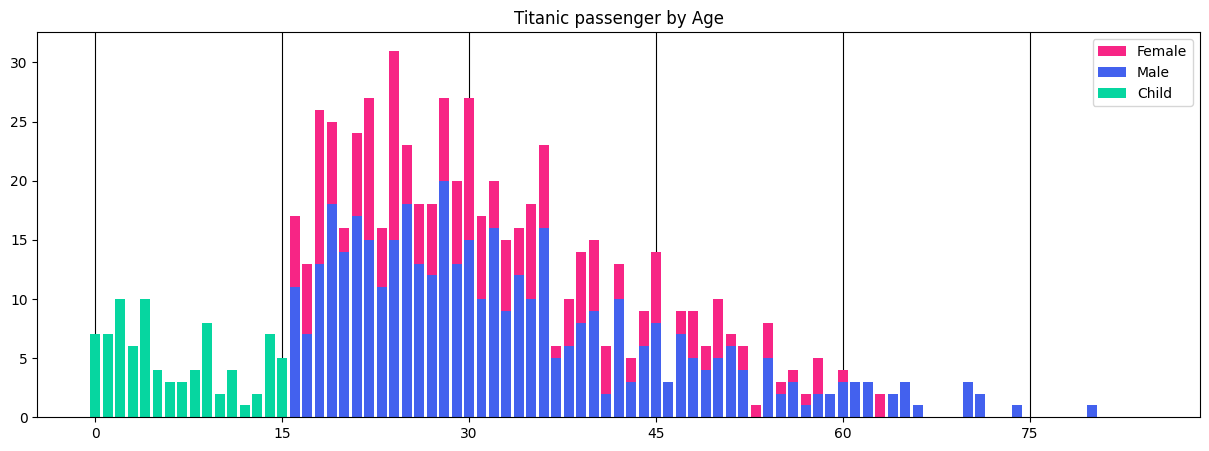

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

# --------------------- Child plot

p_child = ax.bar(
    df_titanic_age.index,
    df_titanic_age['child'],
    color = '#06d6a0',
    label = 'Child'
)

# --------------------- Male plot

p_child = ax.bar(
    df_titanic_age.index,
    df_titanic_age['man'],
    color = '#4361ee',
    label = 'Male'
)

# --------------------- Female plot

p_child = ax.bar(
    df_titanic_age.index,
    df_titanic_age['woman'],
    bottom=df_titanic_age['man'],
    color = '#f72585',
    label = 'Female'
)

# --------------------- Axis settings

ax.set(xticks=np.arange(0, df_titanic_age.index.max(), 15))
ax.grid(axis='x', color = '#000000')
ax.set_axisbelow(True)

# --------------------- Legend

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# --------------------- Title

plt.title('Titanic passenger by Age')

plt.show()

In [68]:
df_alone = pd.DataFrame(
    data={
        'City' : df_titanic['City'].sort_values().unique(),
        'Dummy' : [1] * len(df_titanic['City'].unique())
    }
)

df_alone = df_alone.set_index(df_alone['City'])
df_alone.index.name = None

df_alone = df_alone.drop(columns=['City', 'Dummy'], axis=1)

for item in df_titanic['Alone'].unique() : 
    df_alone = df_alone.join(df_titanic[df_titanic['Alone'] == item]['City'].value_counts().sort_index())
    df_alone = df_alone.rename(columns={'count' : item})

df_alone['All'] = df_alone.iloc[:,0:].sum(axis=1)
df_alone

,no,yes,All
Cherbourg,72,58,130
Queenstown,9,19,28
Southampton,229,325,554


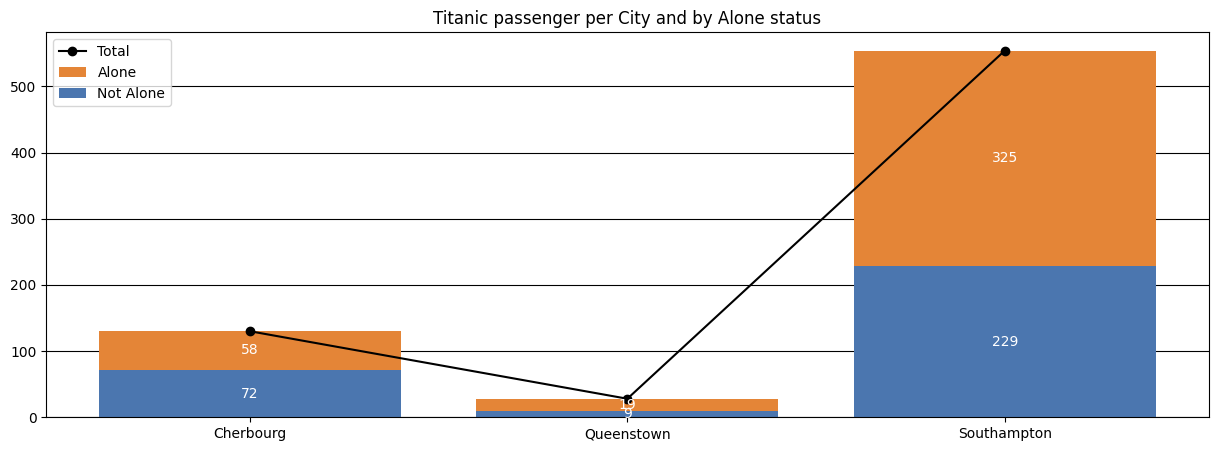

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))

# --------------------- Plot total 

ax.plot(df_alone.index, df_alone['All'], linestyle='-', marker='o', color = '#000000', label = 'Total')

# --------------------- Alone

p_alone = ax.bar(
    df_alone.index,
    df_alone['yes'],
    bottom=df_alone['no'],
    color = '#e48537',
    label = 'Alone'
)

ax.bar_label(p_alone, label_type='center', color='#FFFFFF')

# --------------------- Not Alone

p_not_alone = ax.bar(
    df_alone.index,
    df_alone['no'],
    color = '#4b76af',
    label = 'Not Alone'
)

ax.bar_label(p_not_alone, label_type='center', color='#FFFFFF')



# --------------------- Axis settings

ax.set(yticks=np.arange(0, df_alone['All'].max(), 100))
ax.grid(axis='y', color = '#000000')
ax.set_axisbelow(True)

# --------------------- Legend

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# --------------------- Title

plt.title('Titanic passenger per City and by Alone status')

plt.show()

<Axes: title={'center': 'Titanic passenger per City and by Alone status'}>

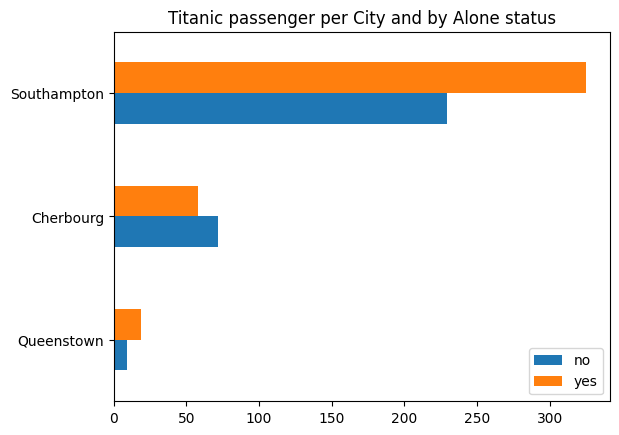

In [111]:
df_alone.sort_values('All').iloc[:,0:2].plot(kind='barh', title='Titanic passenger per City and by Alone status')